In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Testing different sampling distributions

In [2]:
x = np.random.normal(0, 1, 1000)

(array([  8.,  43., 108., 201., 262., 187., 121.,  53.,  14.,   3.]),
 array([-2.84786594, -2.22346816, -1.59907038, -0.97467259, -0.35027481,
         0.27412297,  0.89852075,  1.52291853,  2.14731632,  2.7717141 ,
         3.39611188]),
 <BarContainer object of 10 artists>)

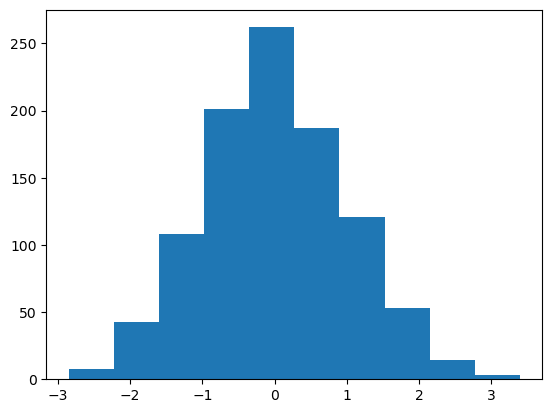

In [3]:
plt.hist(x)

In [17]:
x = np.random.lognormal(1, 3, 10000)

(array([9.997e+03, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.39711245e-05, 1.27066138e+05, 2.54132276e+05, 3.81198415e+05,
        5.08264553e+05, 6.35330691e+05, 7.62396829e+05, 8.89462967e+05,
        1.01652911e+06, 1.14359524e+06, 1.27066138e+06]),
 <BarContainer object of 10 artists>)

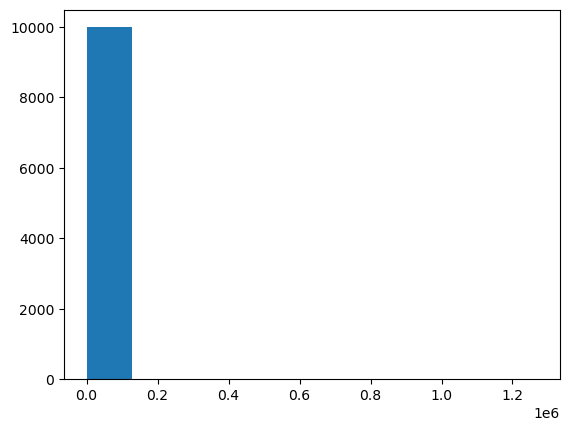

In [18]:
plt.hist(x)

In [19]:
print(np.max(x))
print(np.mean(x))

1270661.382065422
349.39076727661586


In [136]:
x = np.random.uniform(0, 1, 1000)

(array([106.,  84.,  85.,  99., 103., 104., 113.,  89., 101., 116.]),
 array([8.06834739e-04, 1.00673976e-01, 2.00541117e-01, 3.00408258e-01,
        4.00275399e-01, 5.00142540e-01, 6.00009681e-01, 6.99876822e-01,
        7.99743963e-01, 8.99611104e-01, 9.99478245e-01]),
 <BarContainer object of 10 artists>)

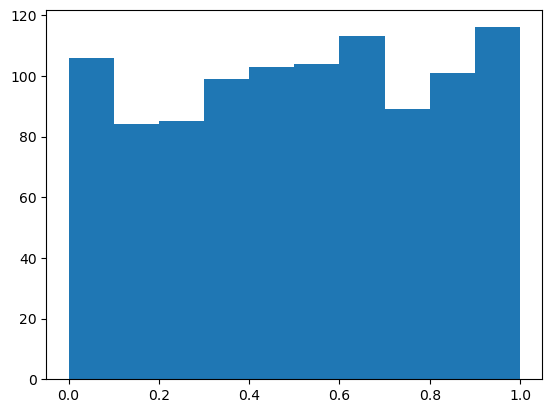

In [137]:
plt.hist(x)

In [138]:
x = np.random.poisson(1, 1000)

(array([367.,   0., 386.,   0., 180.,   0.,  51.,   0.,  15.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

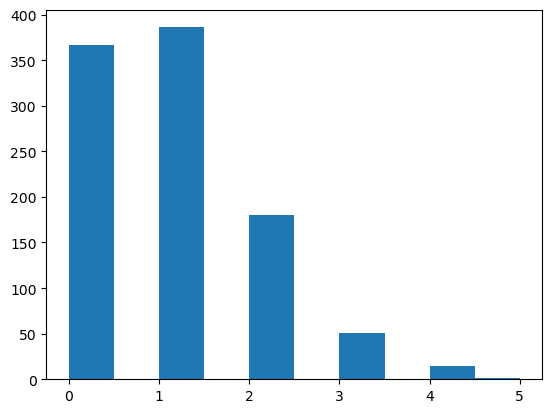

In [139]:
plt.hist(x)

In [140]:
x = np.random.exponential(1, 1000)

(array([531., 239., 127.,  60.,  21.,  16.,   2.,   3.,   0.,   1.]),
 array([2.07558025e-03, 7.94207872e-01, 1.58634016e+00, 2.37847246e+00,
        3.17060475e+00, 3.96273704e+00, 4.75486933e+00, 5.54700162e+00,
        6.33913391e+00, 7.13126620e+00, 7.92339850e+00]),
 <BarContainer object of 10 artists>)

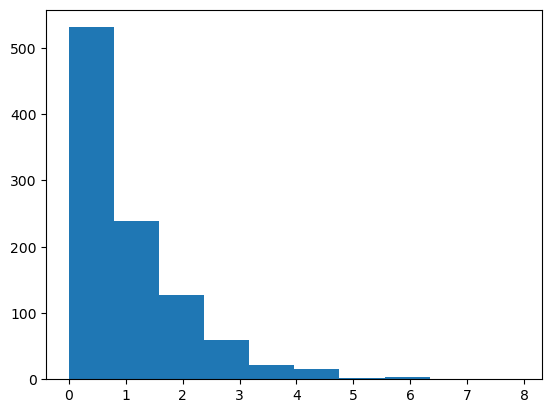

In [141]:
plt.hist(x)

### Creating simple mock dataset

In [33]:
num_samples = 1000
num_features = 10

In [34]:
features = np.random.normal(0, 1, (num_samples, num_features))

In [35]:
weights = np.random.uniform(0, 1, num_features)

In [36]:
targets = np.dot(features, weights)

### Transforming features with Sigmoid function

In [147]:
def Sigmoid(x):
    return 1/(1 + np.exp(-x))

In [148]:
num_samples = 1000
num_features = 10

In [149]:
features = np.random.normal(0, 1, (num_samples, num_features))

In [150]:
transformed_features = Sigmoid(features)

In [151]:
weights = np.random.uniform(0, 1, num_features)

In [152]:
new_targets = np.dot(transformed_features, weights)

### Training a test MLP

In [153]:
from sklearn.neural_network import MLPRegressor

In [154]:
test_model = MLPRegressor(hidden_layer_sizes=(5,), activation='relu', max_iter=10000)

In [155]:
test_model.fit(transformed_features[:800], new_targets[:800])

MLPRegressor(hidden_layer_sizes=(5,), max_iter=10000)

In [156]:
test_model.score(transformed_features[800:], new_targets[800:])

0.8788315090193908

### Experimenting with DataGenerator class

In [1]:
from generator import DataGenerator
import numpy as np

In [6]:
generator = DataGenerator(dist='lognormal', mean=1, std=4, is_int=True, noise=True, seed=22)

In [7]:
data = generator.generate(n_features=5, n_samples=100)

In [8]:
x, y = data

In [25]:
np.mean(x)

6037.072

In [26]:
np.max(x)

1280970

In [21]:
np.mean(y)

4218.782393135471

### Scipy.stats Experiments

In [1]:
import numpy as np
import scipy.stats as stats
from generator import DataGenerator
import matplotlib.pyplot as plt

c:\Users\sonng\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
params = {'x_dist' : 'lognorm', 'y_dist' : 'lognorm', 'mean' : 1, 'std' : 1}

In [3]:
gen = DataGenerator(**params)

In [4]:
x, y = gen.generate(n_features=1, n_samples=100000)

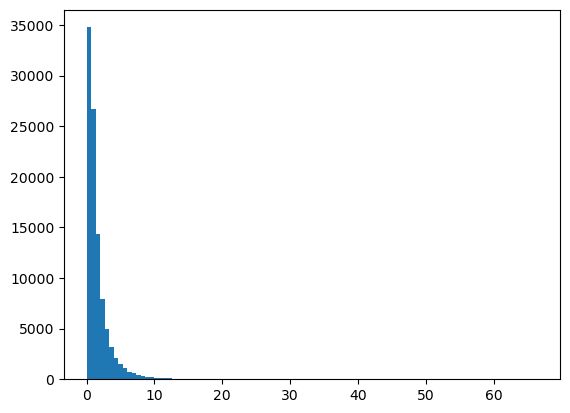

In [5]:
_ =plt.hist(x, 100)

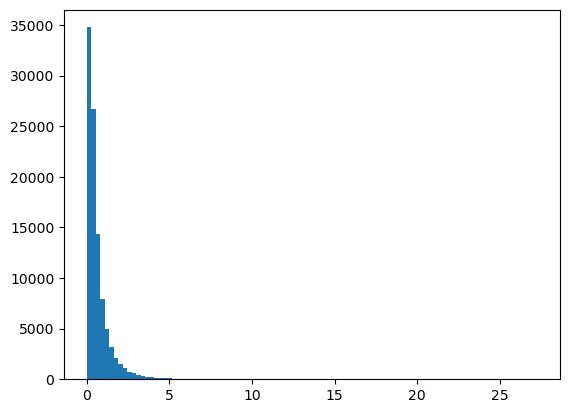

In [6]:
_ = plt.hist(y, 100)

In [7]:
dist_list = ['norm', 'lognorm', 'laplace']

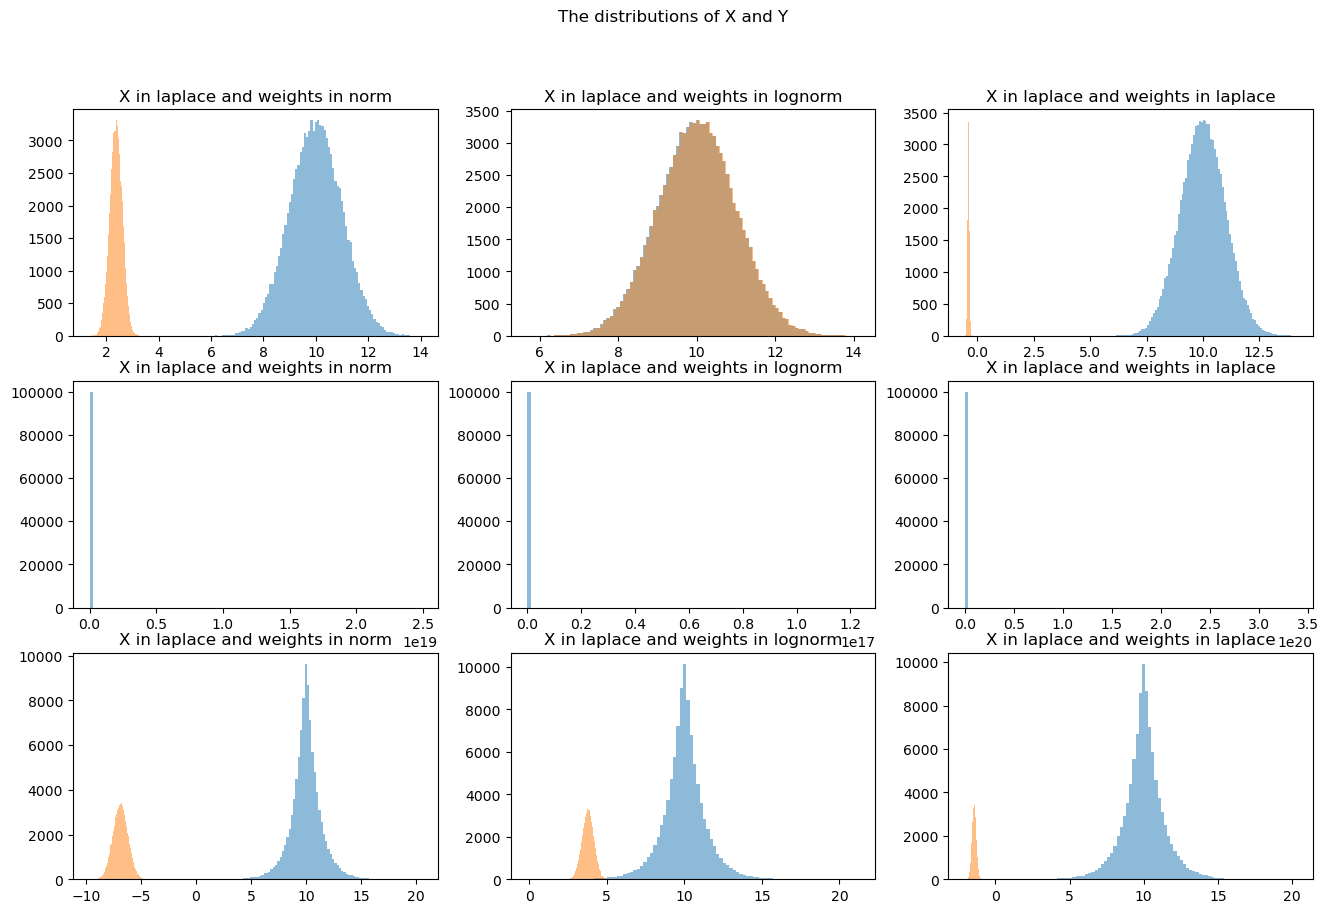

In [9]:
fig, ax = plt.subplots(len(dist_list), len(dist_list), figsize=(16,10))
fig.suptitle('The distributions of X and Y')
for idx, x_dist in enumerate(dist_list):
    for idy, w_dist in enumerate(dist_list):

        params = {'x_dist' : x_dist, 'w_dist' : w_dist, 'mean' : 10, 'std' : 1}
        gen = DataGenerator(**params)
        x, y = gen.generate(n_features=1, n_samples=100000)

        ax[idx, idy].hist(x, bins=100, alpha=0.5, label='x')
        ax[idx, idy].hist(y, bins=100, alpha=0.5, label='x')

        ax[idx, idy].set_title(f'X in {dist} and weights in {w_dist}')


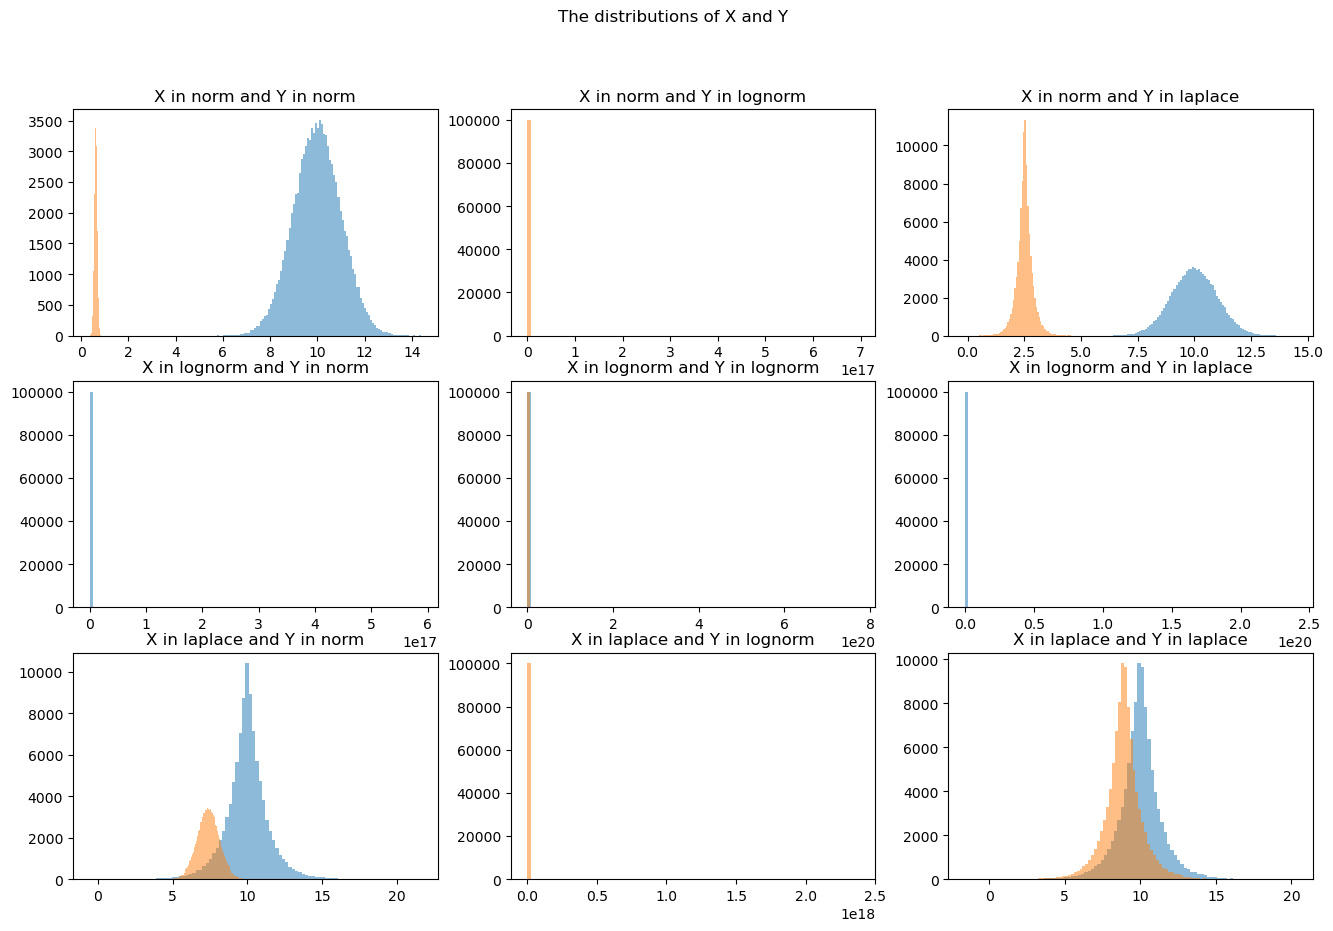

In [11]:
fig, ax = plt.subplots(len(dist_list), len(dist_list), figsize=(16,10))
fig.suptitle('The distributions of X and Y')
for idx, x_dist in enumerate(dist_list):
    for idy, y_dist in enumerate(dist_list):

        params = {'x_dist' : x_dist, 'y_dist' : y_dist, 'mean' : 10, 'std' : 1}
        gen = DataGenerator(**params)
        x, y = gen.generate(n_features=1, n_samples=100000)

        ax[idx, idy].hist(x, bins=100, alpha=0.5, label='x')
        ax[idx, idy].hist(y, bins=100, alpha=0.5, label='x')

        ax[idx, idy].set_title(f'X in {x_dist} and Y in {y_dist}')